# Objective and Work Outline

- This notebook focueses on process mapping
- Process mapping is a valuable technique for visualizing and understanding workflows
- This notebook aims to analyze a dataset that indicates how many emails have been sent by a user, and specifically to who
- This project's main focus is to explore visualization options for the relationship data
- This form of process mapping will help us use MS Graph to learn about how we actually get things done and compare that to how we think things get done
- These graphs/visualizations will help visualize the objectives above
- Graphs use colour, size, and edge length to show the relationships and frequency of email communications
- The notebook includes visual tests for normality and other statistical analyses to identify characteristics of the data
- Based on the data's normality and trends, the notebook allows the user to perform several transformations
- Transformations on edge length were done to improve the clarity of the visualizations

In [167]:
import pandas as pd

# Load the data
file_path = r"cadeau_node_toy_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
display(df.head())

# Display the schema of the dataframe
display(df.dtypes)

# Summary statistics
display(df.describe())

,id,scoredEmailAddresses_0_address,scoredEmailAddresses_0_relevanceScore,scoredEmailAddresses_0_selectionLikelihood
0,DWqu85JqLF,xueelMH@test.com,44,notSpecified
1,ty2R0dssHF,yW5yDUU@example.com,514,notSpecified
2,nEqaswkaRW,FOHCtDQ@example.com,287,notSpecified
3,60IbiuscLo,vnwkFlW@test.com,840,notSpecified
4,LjyH39D90M,PYg9W6s@example.com,408,notSpecified


id                                            object
scoredEmailAddresses_0_address                object
scoredEmailAddresses_0_relevanceScore          int64
scoredEmailAddresses_0_selectionLikelihood    object
dtype: object

,scoredEmailAddresses_0_relevanceScore
count,11.000000
mean,431.727273
std,305.195377
min,1.000000
25%,261.500000
50%,374.000000
75%,627.000000
max,941.000000


In [168]:
import networkx as nx

# Filter the dataframe to get the source and destination nodes
source_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] == 1][["id", "scoredEmailAddresses_0_address"]]
destination_nodes = df[df["scoredEmailAddresses_0_relevanceScore"] != 1][["id", "scoredEmailAddresses_0_address", "scoredEmailAddresses_0_relevanceScore"]]

# Convert the source and destination nodes to lists of dictionaries
source_nodes_list = source_nodes.to_dict('records')
destination_nodes_list = destination_nodes.to_dict('records')

# Create a NetworkX graph
G = nx.DiGraph()

# Add edges to the graph
for source in source_nodes_list:
    for destination in destination_nodes_list:
        G.add_edge(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])

# Regular Node Graph with a Heat Map

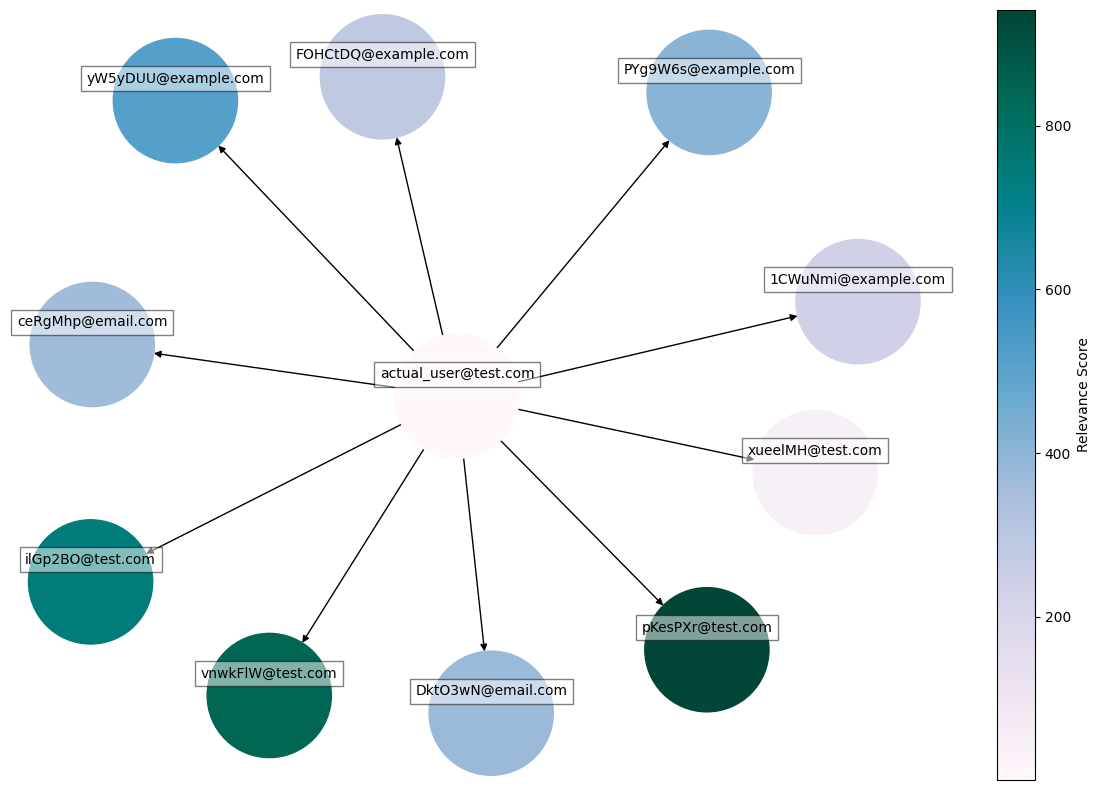

In [169]:
import matplotlib.pyplot as plt
from builtins import min, max  # Import built-in min and max functions
from IPython.display import HTML, display

# Create a dictionary for node colors based on relevance score
node_colors = {}
for node in source_nodes_list:
    node_colors[node['scoredEmailAddresses_0_address']] = 1
for node in destination_nodes_list:
    node_colors[node['scoredEmailAddresses_0_address']] = node['scoredEmailAddresses_0_relevanceScore']

# Draw the graph with a heat map for node colors
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G)
nodes = G.nodes()
colors = [node_colors[node] for node in nodes]
nx.draw(
    G, pos, with_labels=False, node_size=8000, node_color=colors, 
    cmap=plt.cm.PuBuGn, vmin=min(colors), vmax=max(colors), ax=ax
)

# Add labels on top of the nodes
for node, (x, y) in pos.items():
    plt.text(
        x, y + 0.05, s=node, bbox=dict(facecolor='white', alpha=0.5), 
        horizontalalignment='center'
    )

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.PuBuGn, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Relevance Score')

plt.tight_layout()
plt.show()

In the diagram, nodes are email addresses and edges indicate a relationship between them. The data used to create these graphs comes from a dataframe containing email addresses and their relevance scores.

**Source Node:** The user

**Destination Nodes:** The other recipients/senders of emails

The color of each node in the graph represents its relevance score, with a heat map indicating the range of scores. Darker colors indicate higher relevance scores.

**Interpreting the Graph:**

- **Nodes:** Represent email addresses.
- **Edges:** Indicate a relationship between source and destination email addresses.
- **Node Color:** Represents the relevance score of the email address, with a heat map for visual representation.

**Expected Results:** The graph should show a network of email addresses with varying node colors based on their relevance scores. Source nodes will have a fixed color, while destination nodes will vary in color.


# Size of node dependent on relevanceScore

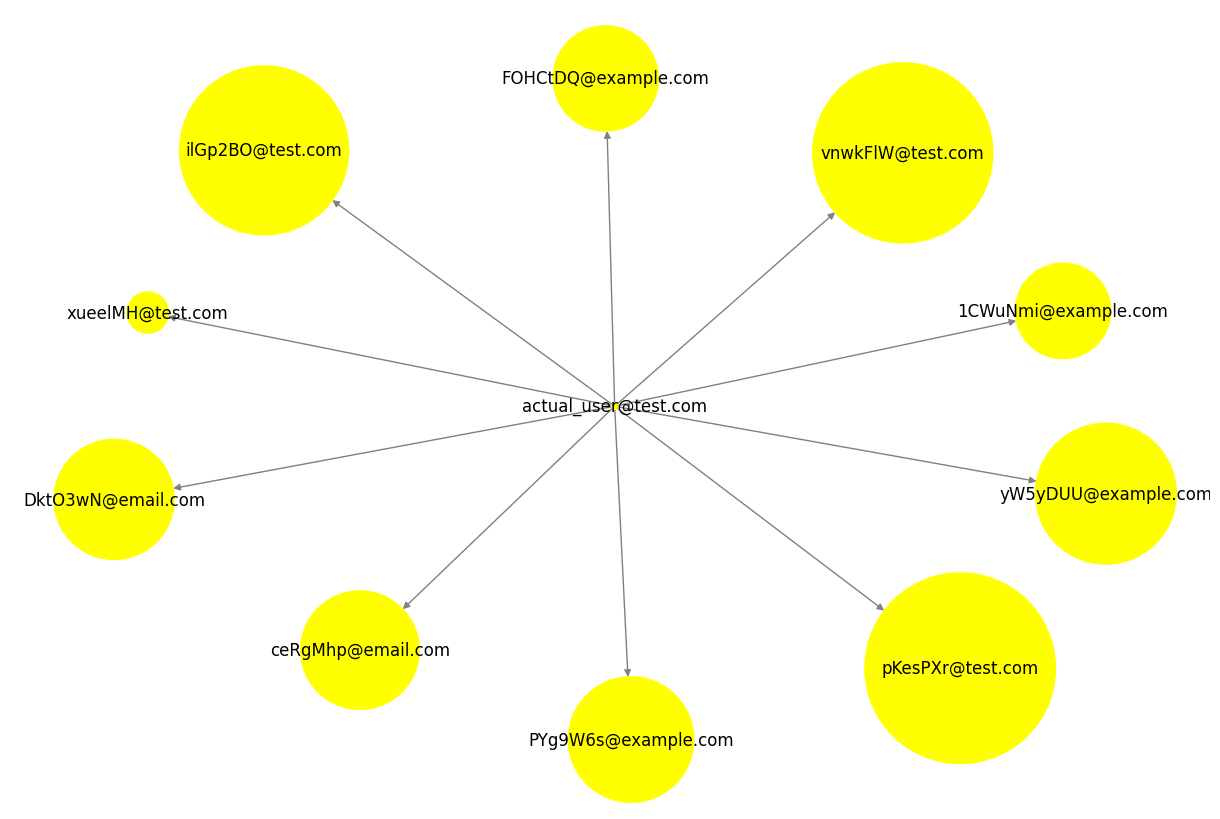

In [170]:
# Create a dictionary for node sizes based on relevance score
node_sizes = {}
for node in source_nodes_list:
    node_sizes[node['scoredEmailAddresses_0_address']] = 20 
for node in destination_nodes_list:
    node_sizes[node['scoredEmailAddresses_0_address']] = node['scoredEmailAddresses_0_relevanceScore'] * 20

# Draw the graph with node sizes representing relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nodes = G.nodes()
sizes = [node_sizes[node] for node in nodes]
nx.draw(G, pos, with_labels=True, node_size=sizes, node_color='yellow', edge_color='gray')
plt.show()

In the diagram, nodes are email addresses and edges indicate a relationship between them. The data used to create these graphs comes from a dataframe containing email addresses and their relevance scores.

**Source Node:** The user

**Destination Nodes:** The other recipients/senders of emails

The size of the nodes are based on the relevance scores of the destination nodes. Larger nodes indicate higher relevance scores.

**Interpreting the Graph:**

- **Nodes:** Represent email addresses.
- **Edges:** Indicate a relationship between source and destination email addresses.
- **Node Size:** Represents the relevance score of the email address, with the node size being larger as the relevance score gets larger

**Expected Results:** The graph should show a network of email addresses with varying node sizes based on their relevance scores. The larger the relevance score, the larger the node


# Heat Map and Node Size

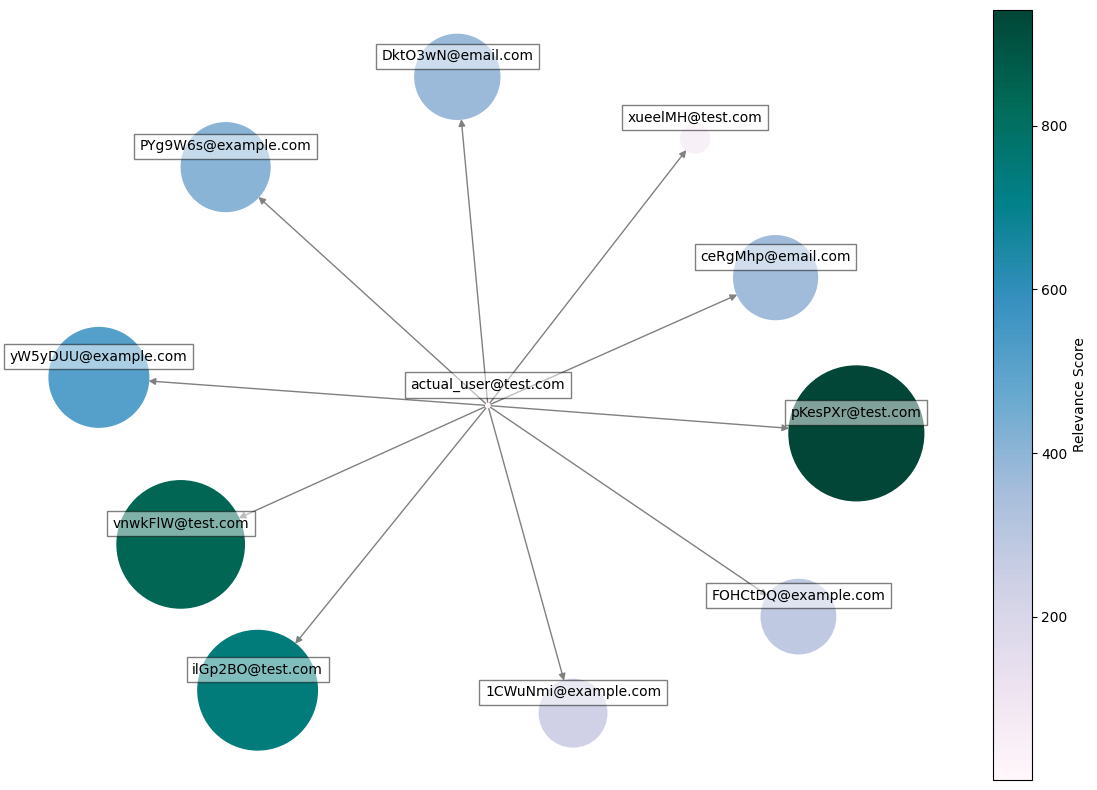

In [171]:
# Collect the source and destination nodes
source_nodes_list = source_nodes.to_dict('records')
destination_nodes_list = destination_nodes.to_dict('records')

# Create dictionaries for node colors and sizes based on relevance score
node_colors = {}
node_sizes = {}
for node in source_nodes_list:
    node_colors[node['scoredEmailAddresses_0_address']] = 1
    node_sizes[node['scoredEmailAddresses_0_address']] = 10
for node in destination_nodes_list:
    node_colors[node['scoredEmailAddresses_0_address']] = node['scoredEmailAddresses_0_relevanceScore']
    node_sizes[node['scoredEmailAddresses_0_address']] = node['scoredEmailAddresses_0_relevanceScore'] * 10

# Draw the graph with a heat map for node colors and sizes representing relevance score
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G)
nodes = G.nodes()
colors = [node_colors[node] for node in nodes]
sizes = [node_sizes[node] for node in nodes]
nx.draw(G, pos, with_labels=False, node_size=sizes, node_color=colors, cmap=plt.cm.PuBuGn, vmin=min(colors), vmax=max(colors), edge_color='gray', ax=ax)

# Add labels on top of the nodes
for node, (x, y) in pos.items():
    plt.text(x, y + 0.05, s=node, bbox=dict(facecolor='white', alpha=0.5), horizontalalignment='center')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.PuBuGn, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Relevance Score')

plt.tight_layout()
plt.show()


In the diagram, nodes are email addresses and edges indicate a relationship between them. The data used to create these graphs comes from a dataframe containing email addresses and their relevance scores.

**Source Node:** The user

**Destination Nodes:** The other recipients/senders of emails

The color of each node in the graph represents its relevance score, with a heat map indicating the range of scores. Darker colors indicate higher relevance scores. The size of the nodes are based on the relevance scores of the destination nodes. Larger nodes indicate higher relevance scores.

**Interpreting the Graph:**

- **Nodes:** Represent email addresses.
- **Edges:** Indicate a relationship between source and destination email addresses.
- **Node Size:** Represents the relevance score of the email address, with the node size being larger as the relevance score gets larger
- **Node Color:** Represents the relevance score of the email address, with a heat map for visual representation.

**Expected Results:** The graph should show a network of email addresses with varying node sizes and colors based on their relevance scores. The source node will have a fixed size and color, while destination nodes will vary in size and color.

# Assess Normality

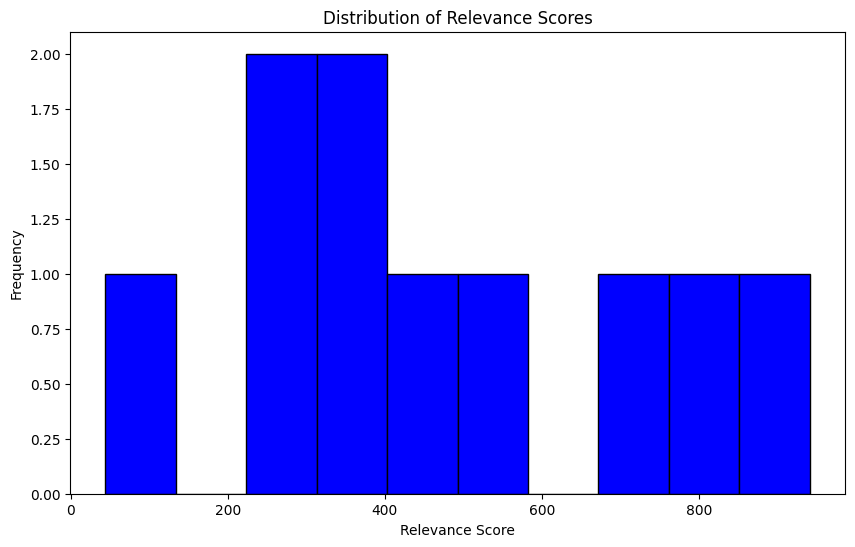

In [172]:
# Plot a histogram for the relevance scores
relevance_scores = df[df["scoredEmailAddresses_0_relevanceScore"] != 1]["scoredEmailAddresses_0_relevanceScore"].tolist()

plt.figure(figsize=(10, 6))
plt.hist(relevance_scores, bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Relevance Scores')
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.show()

This histogram represents the distribution of relevance scores for email addresses. The data used to create this histogram comes from a dataframe containing email addresses and their relevance scores.

**Relevance Scores:** The scores assigned to email addresses based on their relevance. A higher score indicates higher relevance.

**Interpreting the Histogram:**

- **X-axis:** Represents the relevance scores.
- **Y-axis:** Represents the frequency of each relevance score.
- **Bars:** The height of each bar indicates the number of email addresses with a particular relevance score.

**Expected Results:** The histogram should show the distribution of relevance scores, with the frequency of each score represented by the height of the bars. This helps in understanding how relevance scores are spread across the email addresses.

**Assessing Normality:** The shape of the histogram can provide a visual assessment of the normality of the data. A bell-shaped curve suggests that the data may be normally distributed, while significant skewness or kurtosis indicates deviations from normality.


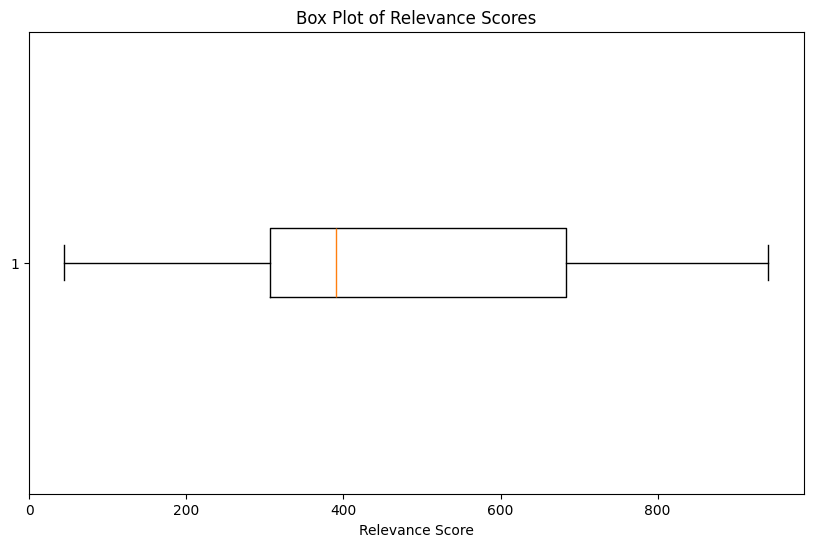

In [173]:
# Plot a box plot for the relevance scores
# Check for symmetry and mean position
relevance_scores = df[df["scoredEmailAddresses_0_relevanceScore"] != 1]["scoredEmailAddresses_0_relevanceScore"].tolist()

plt.figure(figsize=(10, 6))
plt.boxplot(relevance_scores, vert=False)
plt.title('Box Plot of Relevance Scores')
plt.xlabel('Relevance Score')
plt.show()

This box plot represents the distribution of relevance scores for email addresses. The data used to create this box plot comes from a dataframe containing email addresses and their relevance scores.

**Relevance Scores:** The scores assigned to email addresses based on their relevance. A higher score indicates higher relevance.

**Interpreting the Box Plot:**

- **Box:** Represents the interquartile range (IQR), which contains the middle 50% of the data.
- **Whiskers:** Extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively.
- **Median Line:** The line inside the box represents the median relevance score.
- **Outliers:** Points outside the whiskers are considered outliers and are plotted individually.

**Expected Results:** The box plot should show the spread and central tendency of the relevance scores, with potential outliers highlighted. This helps in understanding the distribution and variability of the relevance scores.

**Assessing Normality:** The symmetry of the box plot and the presence of outliers can provide insights into the normality of the data. A symmetric box plot with few outliers suggests that the data may be normally distributed, while significant asymmetry or many outliers indicate deviations from normality.


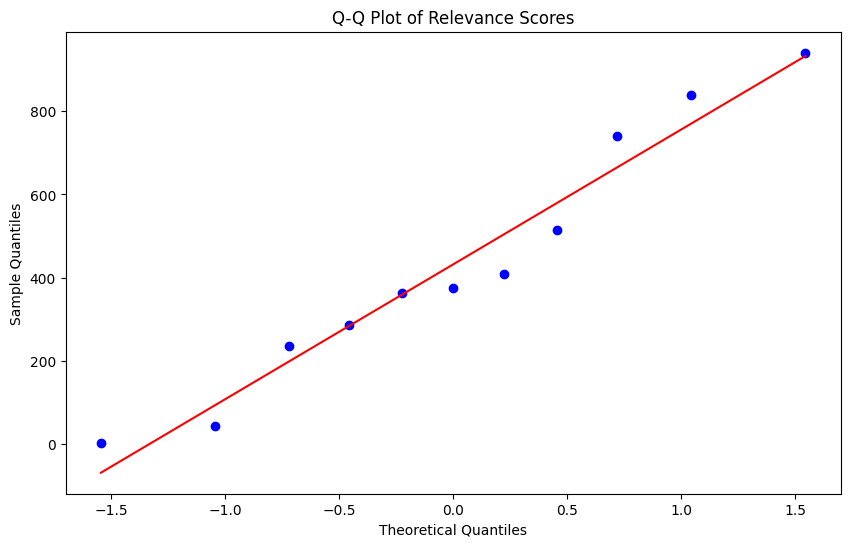

In [174]:
import scipy.stats as stats

## Check if the data follows the line of best fit, and check for skewness
relevance_scores = df["scoredEmailAddresses_0_relevanceScore"].tolist()

plt.figure(figsize=(10, 6))
stats.probplot(relevance_scores, dist="norm", plot=plt)
plt.title('Q-Q Plot of Relevance Scores')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

This Q-Q plot represents the distribution of relevance scores for email addresses compared to a normal distribution. The data used to create this Q-Q plot comes from a dataframe containing email addresses and their relevance scores.

**Relevance Scores:** The scores assigned to email addresses based on their relevance. A higher score indicates higher relevance.

**Interpreting the Q-Q Plot:**

- **X-axis:** Represents the theoretical quantiles from a normal distribution.
- **Y-axis:** Represents the sample quantiles from the relevance scores.
- **Line:** The 45-degree reference line represents where the points would lie if the data were perfectly normally distributed.
- **Points:** The points represent the actual data. Deviations from the line indicate deviations from normality.

**Expected Results:** The Q-Q plot should show how closely the relevance scores follow a normal distribution. Points lying on or near the reference line suggest normality, while significant deviations indicate non-normality.

**Assessing Normality:** The closer the points are to the reference line, the more normally distributed the data is. Significant deviations from the line, especially in the tails, suggest that the data may not be normally distributed.


# Edge length dependent on relevanceScore

### Square Root Transformation

- [Quantifying Health: Square Root Transformation](https://quantifyinghealth.com/square-root-transformation/)
- [Your Data Teacher: When and How to Use Power Transform in Machine Learning](https://www.yourdatateacher.com/2021/04/21/when-and-how-to-use-power-transform-in-machine-learning/)

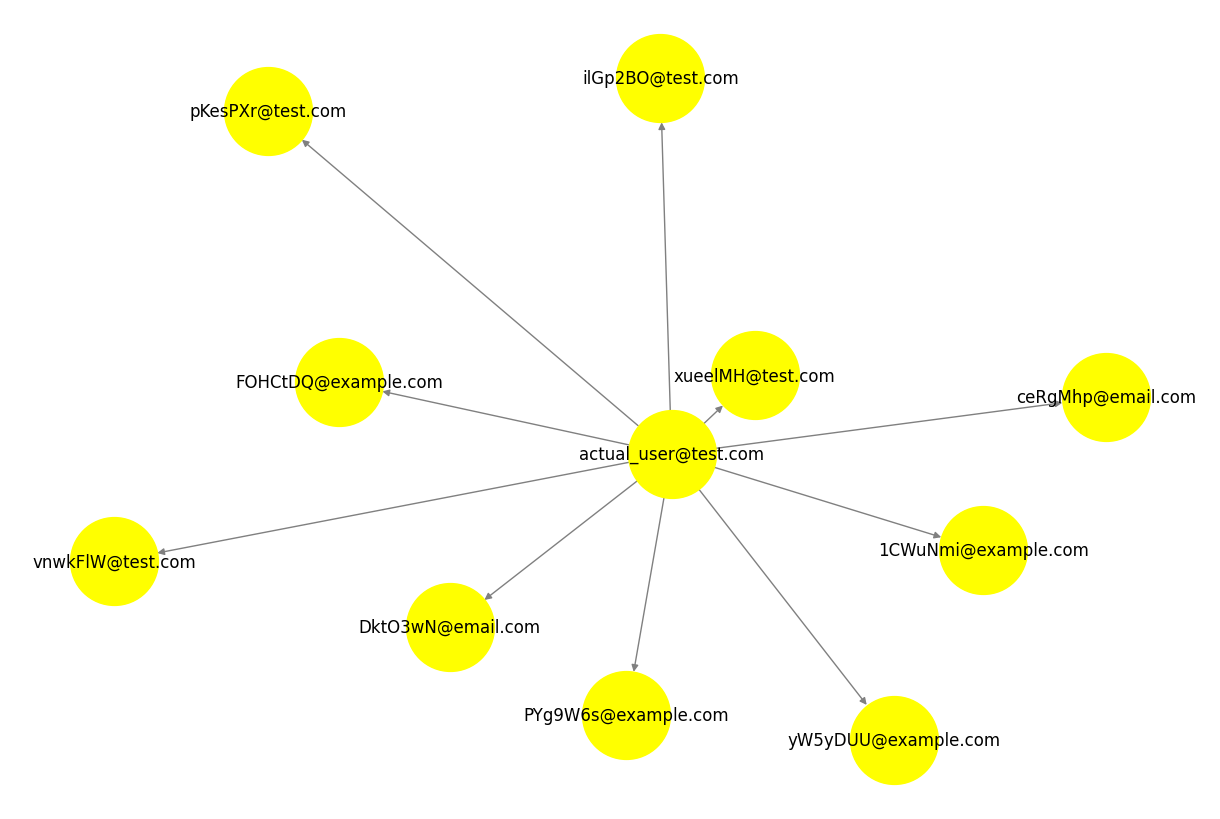

In [175]:
# Create a dictionary for edge lengths based on relevance score
edge_lengths = {}
for _, source in source_nodes.iterrows():
    for _, destination in destination_nodes.iterrows():
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = destination['scoredEmailAddresses_0_relevanceScore']

# Draw the graph with edge lengths representing relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    # Power transformation by sqrt will stabilize variance and will be more normally distributed
    # Reduces skewness as well
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]**0.5
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()

This network graph represents the relationships between email addresses based on their relevance scores. The data used to create this graph comes from a dataframe containing email addresses and their relevance scores.

**Source Node:** The user

**Destination Nodes:** The senders/recipients of the emails

**Edges:** Directed edges from source node to destination nodes, representing the relationship between them.

**Edge Lengths:** The lengths of the edges are based on the relevance scores of the destination nodes. A power transformation (square root) is applied to stabilize variance and reduce skewness.

**Interpreting the Graph:**

- **Nodes:** Represent email addresses. There are yellow nodes, and gray edges represent the connections.
- **Edge Lengths:** Shorter edges indicate lower square rooted relevance scores, while longer edges indicate higher square rooted relevance scores.

**Expected Results:** The graph should show the connections between email addresses, with edge lengths reflecting the square rooted relevance scores. This helps in visualizing the relationships and understanding the distribution of relevance scores.

**Assessing Relationships:** The layout and edge lengths can provide insights into the structure of the network and the importance of different email addresses based on their relevance scores.


### Log Transformations

- [You Should Usually Log Transform Your Positive Data](https://statmodeling.stat.columbia.edu/2019/08/21/you-should-usually-log-transform-your-positive-data/)
- [SAGE Journals: Log Transformation](https://journals.sagepub.com/doi/pdf/10.1177/00045632211050531)

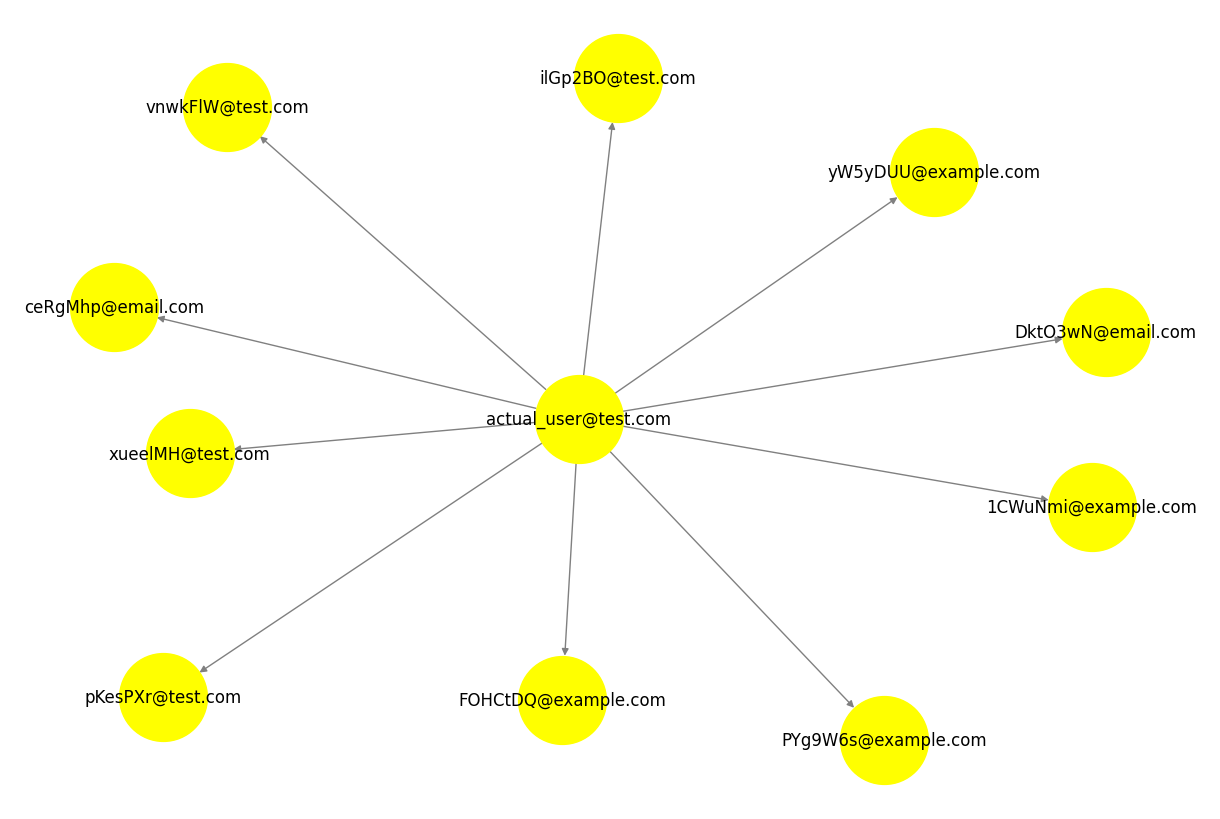

In [176]:
import math

# Create a dictionary for edge lengths based on log-transformed relevance score
# Our goal is to have more validity, additivity, and linearity
edge_lengths = {}
for _, source in source_nodes.iterrows():
    for _, destination in destination_nodes.iterrows():
        log_score = math.log(destination['scoredEmailAddresses_0_relevanceScore'] + 1)
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = log_score

# Draw the graph with edge lengths representing log-transformed relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()

This network graph represents the relationships between email addresses based on their relevance scores. The data used to create this graph comes from a dataframe containing email addresses and their relevance scores.

**Source Node:** The user

**Destination Nodes:** The senders/recipients of the emails

**Edges:** Directed edges from source node to destination nodes, representing the relationship between them.

**Edge Lengths:**  The lengths of the edges are based on the log-transformed relevance scores of the destination nodes. This transformation aims to improve validity, additivity, and linearity.

**Interpreting the Graph:**

- **Nodes:** Represent email addresses. There are yellow nodes, and gray edges represent the connections.
- **Edge Lengths:** Shorter edges indicate lower log relevance scores, while longer edges indicate higher log relevance scores.

**Expected Results:** The graph should show the connections between email addresses, with edge lengths reflecting the log-transformed relevance scores. This helps in visualizing the relationships and understanding the distribution of relevance scores.

**Assessing Relationships:** The layout and edge lengths can provide insights into the structure of the network and the importance of different email addresses based on their relevance scores.


### Box-Cox Transformation

- [The Box-Cox Transformation: What It Is and How to Use It](https://leanscape.io/the-box-cox-transformation-what-it-is-and-how-to-use-it/)
- https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Introductory_Statistics_%28Lane%29/16%3A_Transformations/16.04%3A_Box-Cox_Transformations

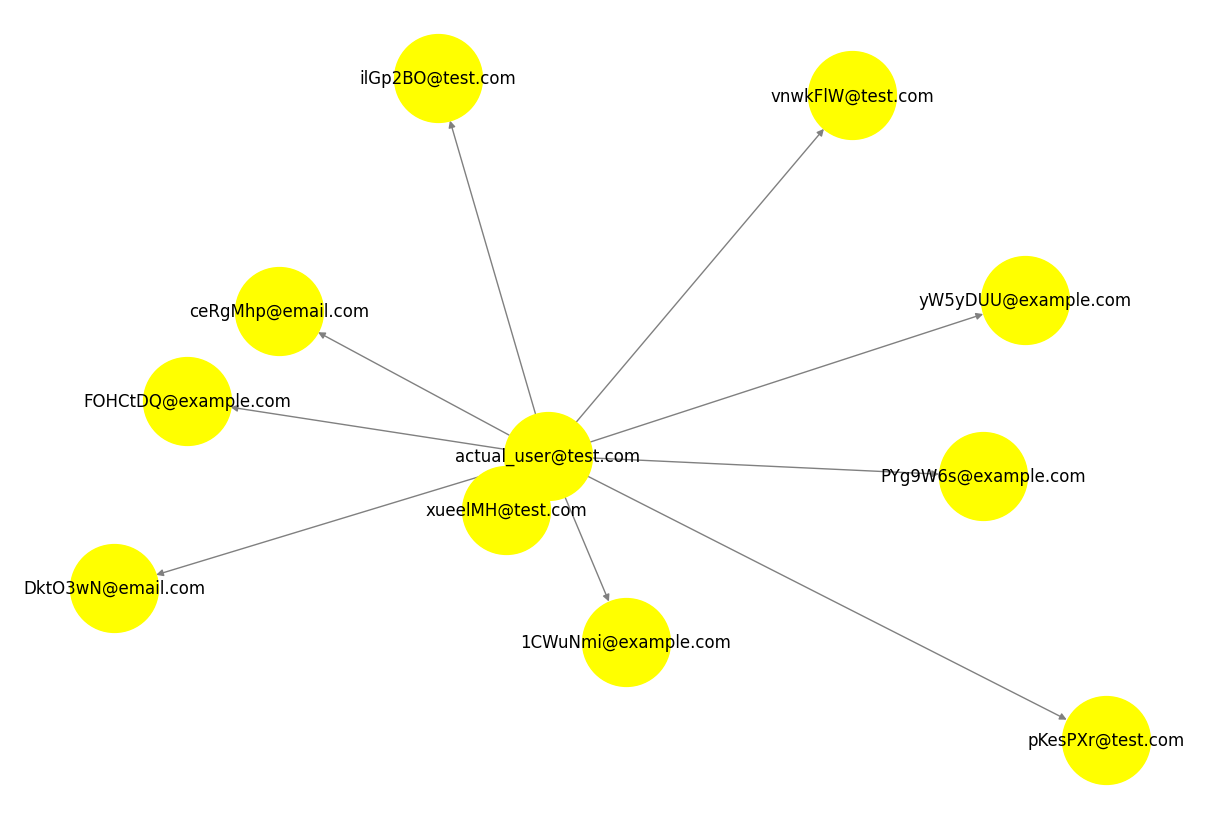

In [177]:
from scipy.stats import boxcox

# Extract relevance scores for Box-Cox transformation
relevance_scores = [row['scoredEmailAddresses_0_relevanceScore'] for row in destination_nodes_list]

# Apply Box-Cox transformation
# Transforms non-normal data into a normal distribution. This transformation can improve the accuracy of predictions
transformed_scores, _ = boxcox(relevance_scores)

# Create a dictionary for edge lengths based on Box-Cox transformed relevance score
edge_lengths = {}
for i, source in enumerate(source_nodes_list):
    for j, destination in enumerate(destination_nodes_list):
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = transformed_scores[j]

# Draw the graph with edge lengths representing Box-Cox transformed relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()

This network graph represents the relationships between email addresses based on their relevance scores. The data used to create this graph comes from a dataframe containing email addresses and their relevance scores.

**Source Node:** The user

**Destination Nodes:** The senders/recipients of the emails

**Edges:** Directed edges from source node to destination nodes, representing the relationship between them.

**Edge Lengths:**  The lengths of the edges are based on the Box-Cox transformed relevance scores of the destination nodes. This transformation aims to normalize the data, improving the accuracy of predictions.

**Interpreting the Graph:**

- **Nodes:** Represent email addresses. There are yellow nodes, and gray edges represent the connections.
- **Edge Lengths:** Shorter edges indicate lower boxcox relevance scores, while longer edges indicate higher boxcox relevance scores.

**Expected Results:** The graph should show the connections between email addresses, with edge lengths reflecting the Box-Cox transformed relevance scores. This helps in visualizing the relationships and understanding the distribution of relevance scores.

**Assessing Relationships:** The layout and edge lengths can provide insights into the structure of the network and the importance of different email addresses based on their relevance scores.


### Ranked Transformation

- [What Is Rank Transformation?](https://statisticseasily.com/glossario/what-is-rank-transformation/)

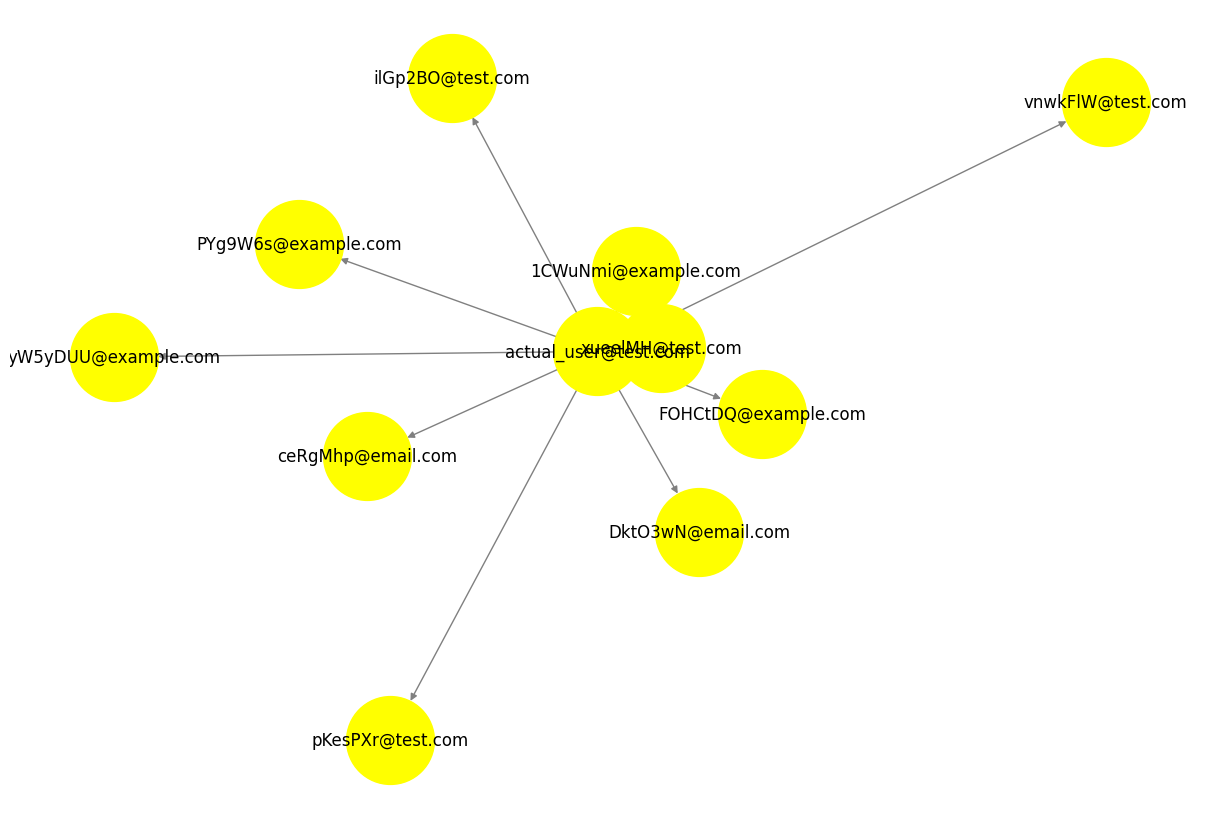

In [178]:
# Apply rank transformation to relevance scores
# Use when dealing with non-parametric data or when the assumptions of normality in parametric tests are not met
destination_nodes['ranked_relevance_score'] = destination_nodes['scoredEmailAddresses_0_relevanceScore'].rank()

# Collect the source and destination nodes
source_nodes_list = source_nodes.to_dict('records')
destination_nodes_list = destination_nodes.to_dict('records')

# Create a dictionary for edge lengths based on ranked relevance score
edge_lengths = {}
for source in source_nodes_list:
    for destination in destination_nodes_list:
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = destination['ranked_relevance_score']

# Draw the graph with edge lengths representing ranked relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()


This network graph represents the relationships between email addresses based on their relevance scores. The data used to create this graph comes from a dataframe containing email addresses and their relevance scores.

**Source Node:** The user

**Destination Nodes:** The senders/recipients of the emails

**Edges:** Directed edges from source node to destination nodes, representing the relationship between them.

**Edge Lengths:**  The lengths of the edges are based on the ranked relevance scores of the destination nodes. This transformation is used when dealing with non-parametric data or when the assumptions of normality in parametric tests are not met.

**Interpreting the Graph:**

- **Nodes:** Represent email addresses. There are yellow nodes, and gray edges represent the connections.
- **Edge Lengths:** Shorter edges indicate lower ranked relevance scores, while longer edges indicate higher ranked relevance scores.

**Expected Results:** The graph should show the connections between email addresses, with edge lengths reflecting the ranked relevance scores. This helps in visualizing the relationships and understanding the distribution of relevance scores.

**Assessing Relationships:** The layout and edge lengths can provide insights into the structure of the network and the importance of different email addresses based on their relevance scores.


# Standardized Approach


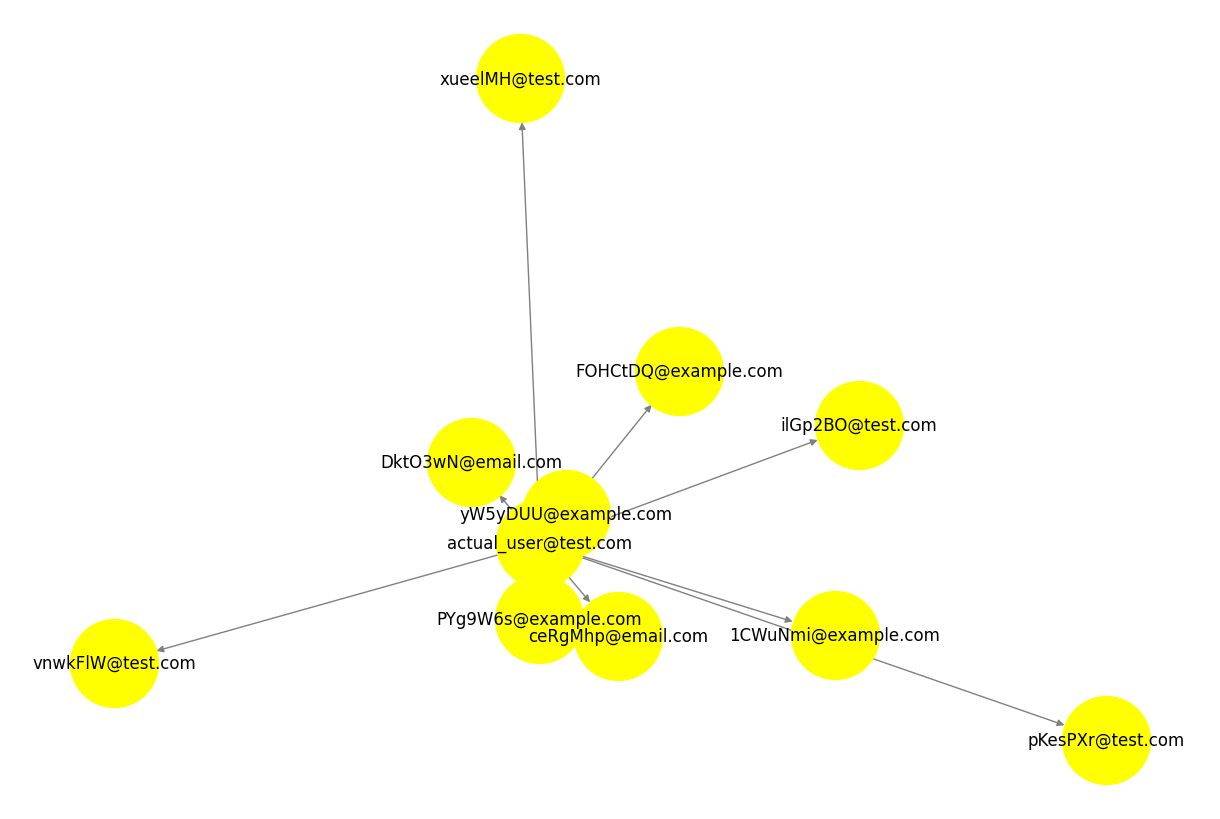

In [179]:
# Collect the source and destination nodes
source_nodes_list = source_nodes.to_dict('records')
destination_nodes_list = destination_nodes.to_dict('records')

# Calculate mean and standard deviation of relevance scores
mean_relevance = destination_nodes["scoredEmailAddresses_0_relevanceScore"].mean()
stddev_relevance = destination_nodes["scoredEmailAddresses_0_relevanceScore"].std()

# Create a dictionary for edge lengths based on standardized relevance score
edge_lengths = {}
for source in source_nodes_list:
    for destination in destination_nodes_list:
        standardized_score = (destination['scoredEmailAddresses_0_relevanceScore'] - mean_relevance) / stddev_relevance
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = standardized_score

# Draw the graph with edge lengths representing standardized relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()

This network graph represents the relationships between email addresses based on their relevance scores. The data used to create this graph comes from a dataframe containing email addresses and their relevance scores.

**Source Node:** The user

**Destination Nodes:** The senders/recipients of the emails

**Edges:** Directed edges from source node to destination nodes, representing the relationship between them.

**Edge Lengths:**  The lengths of the edges are based on the standardized relevance scores of the destination nodes. This transformation standardizes the data by subtracting the mean and dividing by the standard deviation.

**Interpreting the Graph:**

- **Nodes:** Represent email addresses. There are yellow nodes, and gray edges represent the connections.
- **Edge Lengths:** Shorter edges indicate lower standardized relevance scores, while longer edges indicate higher standardized relevance scores.

**Expected Results:** The graph should show the connections between email addresses, with edge lengths reflecting the standardized relevance scores. This helps in visualizing the relationships and understanding the distribution of relevance scores.

**Assessing Relationships:** The layout and edge lengths can provide insights into the structure of the network and the importance of different email addresses based on their relevance scores.


# Normalized Approach

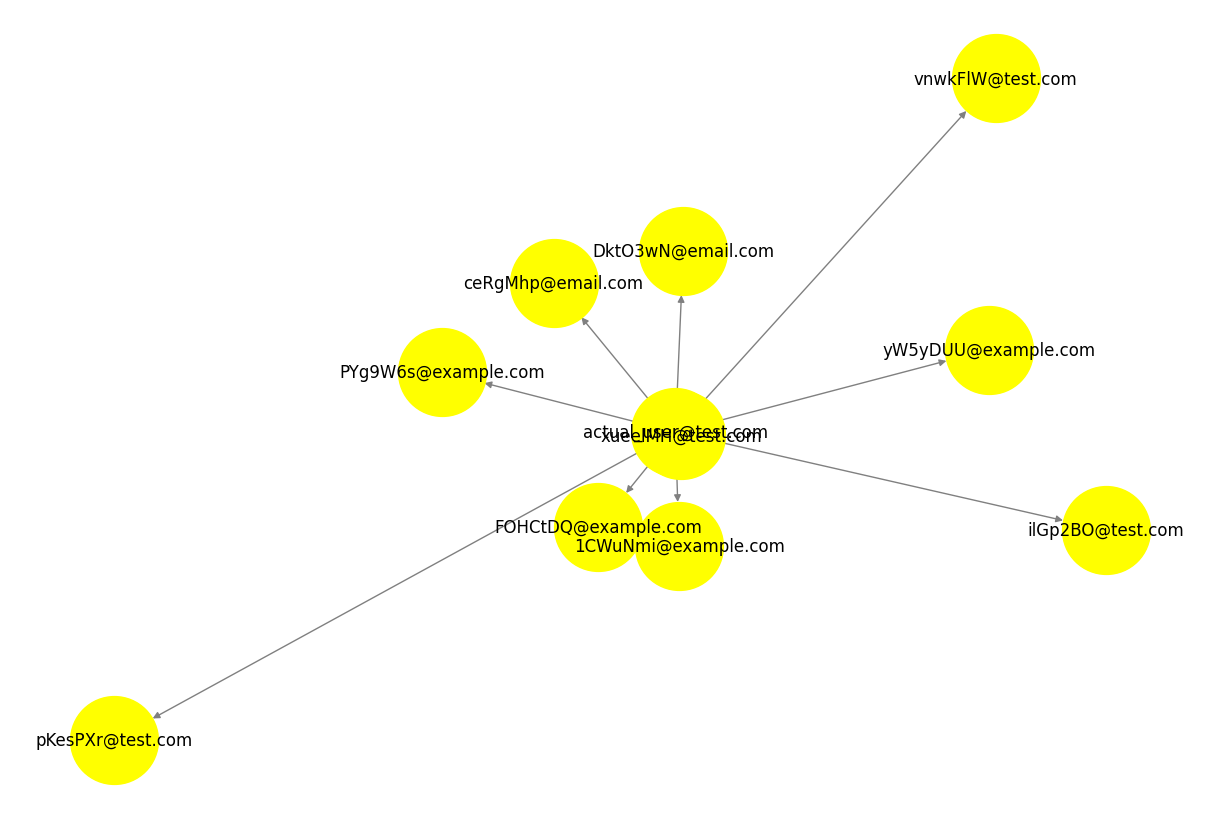

In [180]:
# Calculate min and max of relevance scores
min_relevance = destination_nodes["scoredEmailAddresses_0_relevanceScore"].min()
max_relevance = destination_nodes["scoredEmailAddresses_0_relevanceScore"].max()

# Create a dictionary for edge lengths based on normalized relevance score
edge_lengths = {}
for source in source_nodes_list:
    for destination in destination_nodes_list:
        normalized_score = (destination['scoredEmailAddresses_0_relevanceScore'] - min_relevance) / (max_relevance - min_relevance)
        edge_lengths[(source['scoredEmailAddresses_0_address'], destination['scoredEmailAddresses_0_address'])] = normalized_score

# Draw the graph with edge lengths representing normalized relevance score
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1, scale=2, weight=None)
for edge in G.edges():
    pos[edge[1]] = pos[edge[1]] * edge_lengths[edge]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='yellow', edge_color='gray')
plt.show()

This network graph represents the relationships between email addresses based on their relevance scores. The data used to create this graph comes from a dataframe containing email addresses and their relevance scores.

**Source Node:** The user

**Destination Nodes:** The senders/recipients of the emails

**Edges:** Directed edges from source node to destination nodes, representing the relationship between them.

**Edge Lengths:**  The lengths of the edges are based on the normalized relevance scores of the destination nodes. This transformation normalizes the data by scaling the scores between 0 and 1.

**Interpreting the Graph:**

- **Nodes:** Represent email addresses. There are yellow nodes, and gray edges represent the connections.
- **Edge Lengths:** Shorter edges indicate lower normalized relevance scores, while longer edges indicate higher normalized relevance scores.

**Expected Results:** The graph should show the connections between email addresses, with edge lengths reflecting the normalized relevance scores. This helps in visualizing the relationships and understanding the distribution of relevance scores.

**Assessing Relationships:** The layout and edge lengths can provide insights into the structure of the network and the importance of different email addresses based on their relevance scores.
